In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
fashion_mnist = tf.keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


In [ ]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [ ]:
## Data exploration

print(f"Shape of training set : {train_images.shape}")
print(f"Shape of test set : {test_images.shape}")
print(f"Length of training set : {len(train_images)}")
print(f"Length of test set : {len(test_images)}")
print(f"Labels of train set : {train_labels}")
print(f"Labels of test set : {test_labels}")

Shape of training set : (60000, 28, 28)
Shape of test set : (10000, 28, 28)
Length of training set : 60000
Length of test set : 10000
Labels of train set : [9 0 0 ... 3 0 5]
Labels of test set : [9 2 1 ... 8 1 5]


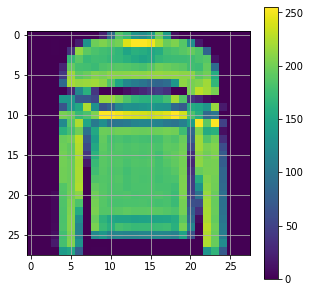

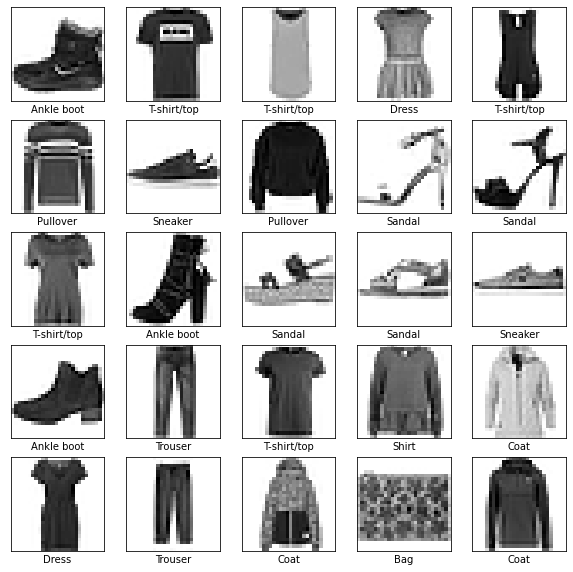

In [ ]:
# Data processing

plt.figure(figsize=(5,5))
plt.imshow(train_images[5])
plt.colorbar()
plt.grid(True)
plt.show()

train_images = train_images / 255.0

test_images = test_images / 255.0


plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

In [ ]:
# Build Model

model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10)
])

# Compile the model

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])


# Train the model

model.fit(train_images, train_labels, epochs=10)

# Accuracy 

test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

print('\nTest accuracy:', test_acc)

Epoch 1/10
1875/1875 [==============================] - 5s 1ms/step - loss: 0.6398 - accuracy: 0.7755
Epoch 2/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.3856 - accuracy: 0.8603
Epoch 3/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.3405 - accuracy: 0.8750
Epoch 4/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.3059 - accuracy: 0.8879
Epoch 5/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2933 - accuracy: 0.8920
Epoch 6/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.2800 - accuracy: 0.8976
Epoch 7/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2686 - accuracy: 0.9018
Epoch 8/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2577 - accuracy: 0.9044
Epoch 9/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.2438 - accuracy: 0.9093
Epoch 10/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.240

In [ ]:
# predictions 

probability_model = tf.keras.Sequential([model, 
                                         tf.keras.layers.Softmax()])
predictions = probability_model.predict(test_images)
print(f"prediction probablity : {predictions[0]}") 

#A prediction is an array of 10 numbers. They represent the model's "confidence"
# that the image corresponds to each of the 10 different articles of clothing.
# You can see which label has the highest confidence value:

print(f"Probablity : {np.argmax(predictions[0])}")

print(f"Test Label Prediction : {test_labels[0]}")

prediction probablity : [3.4480406e-06 2.4086138e-09 5.2446331e-10 1.6807708e-10 1.9704275e-07
 7.7501610e-03 2.9311110e-07 1.4447144e-01 4.3276481e-07 8.4777403e-01]
Probablity : 9
Test Label Prediction : 9


In [ ]:
# Graphical illustration of predictions :

def plot_image(i, predictions_array, true_label, img):
  true_label, img = true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  true_label = true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

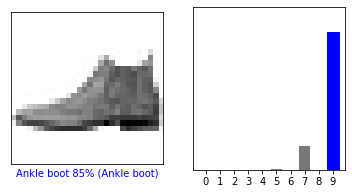

In [ ]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

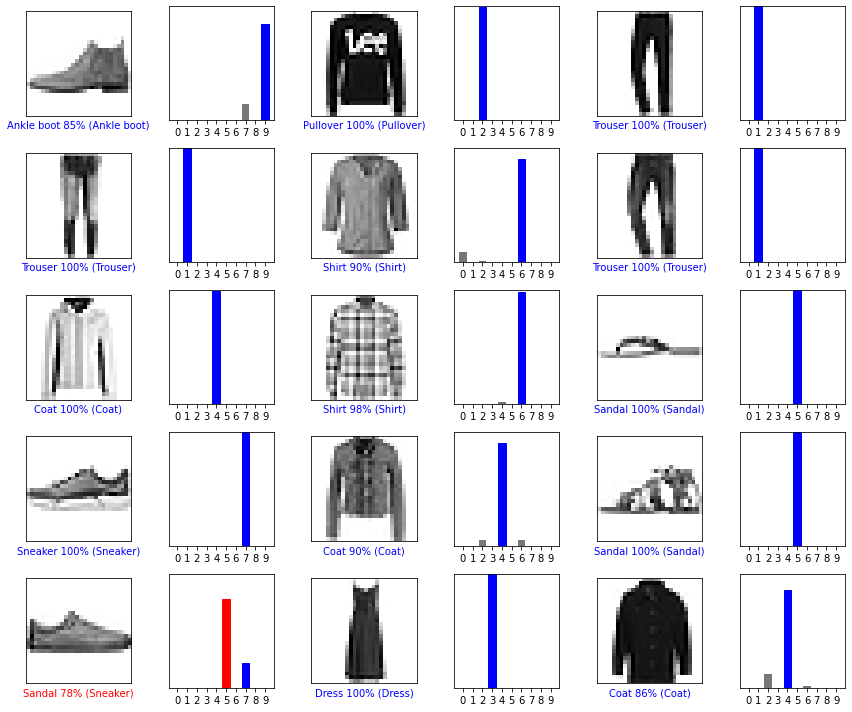

In [ ]:
# Plot the first X test images, their predicted labels, and the true labels.
# Color correct predictions in blue and incorrect predictions in red.
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()

(28, 28)
(1, 28, 28)
[[7.8610574e-06 3.7494587e-15 9.9574631e-01 2.3739521e-10 1.3219869e-03
  2.2712199e-10 2.9238292e-03 1.3507473e-14 1.9936905e-11 4.9286227e-17]]


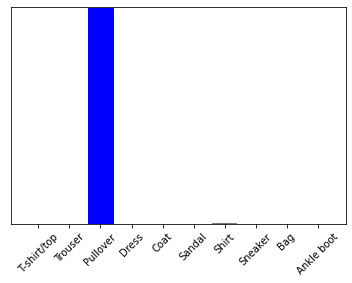

In [ ]:
# Using the trained model

# Grab an image from the test dataset.
img = test_images[1]

print(img.shape)

# Add the image to a batch where it's the only member.
img = (np.expand_dims(img,0))

print(img.shape)

predictions_single = probability_model.predict(img)

print(predictions_single)

plot_value_array(1, predictions_single[0], test_labels)
_ = plt.xticks(range(10), class_names, rotation=45)

In [ ]:
np.argmax(predictions_single[0])